In [25]:
import torch
from torch import tensor
from torch.utils.data import random_split
import pandas as pd
from sentence_transformers import SentenceTransformer
from torch_geometric.data import HeteroData,Data
import numpy as np
import os.path as osp
import pickle
import random
from sklearn.preprocessing import OneHotEncoder
import torch.nn as nn


pes_path = osp.join('Data/ara-protein/raw', '1_Sos1-100mM.csv')

df = pd.read_csv(pes_path, header=None)
my_tensor = np.array(df)
# my_tensor = torch.tensor(my_array, dtype=torch.float)
# my_tensor = my_tensor.unsqueeze(0)
nosalt = my_tensor[:588, 4:]
salt = my_tensor[588:, 4:]

In [26]:
salt.shape

(588, 20)

In [2]:
def sliding_window(train, sw_width=588, n_out=7, in_start=0):
    '''
    该函数实现窗口宽度为7、滑动步长为1的滑动窗口截取序列数据
    截取所有特征

    '''
    data = train
    X= []

    for _ in range(len(data)):
        in_end = in_start + sw_width
        out_end = in_end + n_out

        # 保证截取样本完整，最大元素索引不超过原序列索引，则截取数据；否则丢弃该样本
        if out_end < len(data):
            # 因为是for循环，所以滑动窗口的滑动步长为1；想调整滑动步长可以通过yield实现，后边的文章会讲；
            X.append(data[in_start:in_end, :])  # 截取窗口宽度数量的采样点的全部8个特征
        in_start += 1

    return np.array(X)

df3 = salt.T.flatten()

x = sliding_window(df3[:, np.newaxis])
print(x.shape)

(13517, 588, 1)


In [3]:
df3.shape

(14112,)

In [28]:
def _slide_window(rows, sw_width, sw_steps):
    '''
    函数功能：
    按指定窗口宽度和滑动步长实现单列数据截取
    --------------------------------------------------
    参数说明：
    rows：单个文件中的行数；
    sw_width：滑动窗口的窗口宽度；
    sw_steps：滑动窗口的滑动步长；
    '''
    start = 0
    s_num = (rows - sw_width) // sw_steps # 计算滑动次数
    new_rows = sw_width + (sw_steps * s_num) # 完整窗口包含的行数，丢弃少于窗口宽度的采样数据；
    
    while True:
        if (start + sw_width) > new_rows: # 如果窗口结束索引超出最大索引，结束截取；
            return
        yield start, start + sw_width
        start += sw_steps


In [29]:
_test_list = []
i=0
for start,end in _slide_window(df3.shape[0], 588, 4):
    _test_list.append(df3[start:end])

    i += 1
    
print(f"循环了{i}")

循环了3382


In [14]:
len(_test_list)

3382

In [22]:
salt[:,i].shape

(588,)

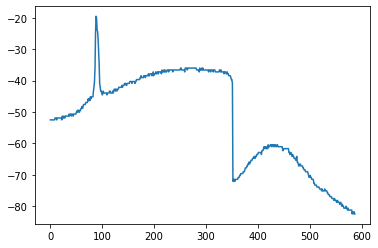

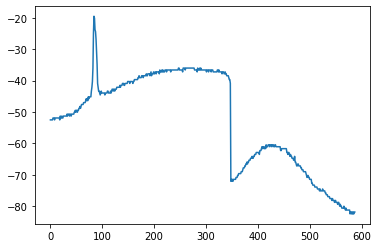

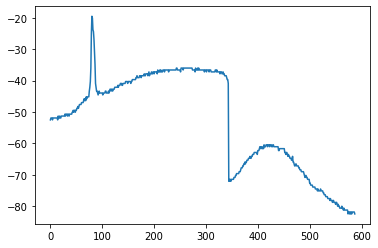

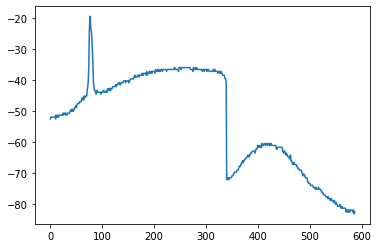

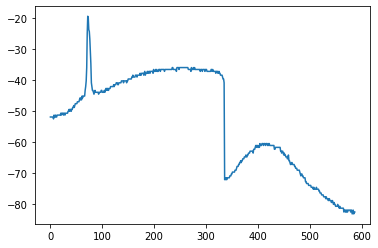

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5):
#     plt.plot(salt[:,i],c="r",lw=2)
    plt.plot(_test_list[i+500])
    
    
#     plt.savefig(f"{i}_salt.png",transparent = True,dpi=400)
    plt.show()

In [ ]:
_test_list[0].shape

In [ ]:
i

In [ ]:
s=10
(14112-588)/s+1